Fazendo uma análise inicial dos dados

Imports e conexão com o banco de dados

In [11]:
import sqlite3 
import pandas as pd

con = sqlite3.connect('datasource/loja.db')

Verificando os nomes das tabelas do banco de dados

In [12]:
tabelas_db_loja = pd.read_sql_query('''SELECT name FROM  sqlite_master 
                                       WHERE type ='table' AND name NOT LIKE 'sqlite_%';''', con)

print(tabelas_db_loja)

      name
0  cliente
1  produto


Transformando as tabelas em dataframe

In [13]:
cliente_df = pd.read_sql_query('SELECT * FROM cliente', con)
produto_df = pd.read_sql_query('SELECT * FROM produto', con)
display(cliente_df)
display(produto_df)

,index,codigo,nome_razao_social,data_cadastro,situacao,email,classificacao_cliente,ramo_atividade,condicao
0,0,1,CLIENTE 1,2009-04-09,ATIVO,CLIENTE1@example.com,+180 DIAS SEM VENDA,N/I,28
1,1,10,CLIENTE 10,2018-08-31,ATIVO,CLIENTE10@example.com,BOM,CONSUMIDOR FINAL,28
2,2,11,CLIENTE 11,2018-08-31,INATIVO,CLIENTE11@example.com,+180 DIAS SEM VENDA,LOJA,28
3,3,12,CLIENTE 12,2018-08-31,ATIVO,CLIENTE12@example.com,+180 DIAS SEM VENDA,LOJA,14
4,4,13,CLIENTE 13,2018-08-31,INATIVO,CLIENTE13@example.com,BOM,FABRICANTE,7
...,...,...,...,...,...,...,...,...,...
4932,4932,10503,CLIENTE 10503,2020-09-10,ATIVO,CLIENTE10503@example.com,BOM,LOJA,14
4933,4933,10504,CLIENTE 10504,2020-09-10,ATIVO,CLIENTE10504@example.com,BOM,CONSUMIDOR FINAL,14
4934,4934,10505,CLIENTE 10505,2020-09-10,ATIVO,CLIENTE10505@example.com,BOM,SITE MONTOLIT,21
4935,4935,10506,CLIENTE 10506,2020-09-10,ATIVO,CLIENTE10506@example.com,BOM,LOJA,21


,index,sku,descricao,familia,data_lancamento,origem,unidade_medida,preco
0,0,7898632210323,PRODUTO 8068,FAMILIA PRODUTO 8068,2018-09-14,ACABADO,PCT,1.080
1,1,7898945165426,PRODUTO 8247,FAMILIA PRODUTO 8247,2018-09-14,ACABADO,PCT,9.348
2,2,7898632210422,PRODUTO 8248,FAMILIA PRODUTO 8248,2018-09-14,ACABADO,PCT,8.500
3,3,7898632211320,PRODUTO 8458,FAMILIA PRODUTO 8458,2018-09-14,ACABADO,PC,0.783
4,4,7898945165099,PRODUTO 8603,FAMILIA PRODUTO 8603,2018-09-14,PRODUTO,PC,15.000
...,...,...,...,...,...,...,...,...
603,603,1792,PRODUTO 1792,FAMILIA PRODUTO 1792,2020-07-16,MATERIA PRIMA,KG,5.000
604,604,1795,PRODUTO 1795,FAMILIA PRODUTO 1795,2020-08-10,PRODUTO,PC,2.380
605,605,1797,PRODUTO 1797,FAMILIA PRODUTO 1797,2020-08-15,PRODUTO,UN,5811.310
606,606,1818,PRODUTO 1818,FAMILIA PRODUTO 1818,2020-08-20,PRODUTO,UN,4.500


Removendo colunas desnecessárias para o projeto e renomeando algumas.

In [14]:
cliente_df.drop(['index', 'data_cadastro', 'situacao', 'email', 'classificacao_cliente', 'ramo_atividade'], axis=1, inplace=True)
cliente_df.rename(columns={'codigo': 'cod_cliente'}, inplace=True)

produto_df.drop(['index', 'descricao', 'familia', 'data_lancamento', 'origem', 'unidade_medida'], axis=1, inplace=True)
produto_df.rename(columns={'preco': 'preco_condicao_0'}, inplace=True)

display(cliente_df)
display(produto_df)

,cod_cliente,nome_razao_social,condicao
0,1,CLIENTE 1,28
1,10,CLIENTE 10,28
2,11,CLIENTE 11,28
3,12,CLIENTE 12,14
4,13,CLIENTE 13,7
...,...,...,...
4932,10503,CLIENTE 10503,14
4933,10504,CLIENTE 10504,14
4934,10505,CLIENTE 10505,21
4935,10506,CLIENTE 10506,21


,sku,preco_condicao_0
0,7898632210323,1.080
1,7898945165426,9.348
2,7898632210422,8.500
3,7898632211320,0.783
4,7898945165099,15.000
...,...,...
603,1792,5.000
604,1795,2.380
605,1797,5811.310
606,1818,4.500


Transformando a `tabela_condicao.csv` em dataframe

In [15]:
tabela_condicoes = pd.read_csv('datasource/tabela_condicao.csv')
print(tabela_condicoes)

   condicao  fator
0         7   0.10
1        14   0.15
2        21   0.20
3        28   0.25


Verificando se há valores nulos nas tabelas

In [16]:
cliente_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   cod_cliente        4937 non-null   object
 1   nome_razao_social  4937 non-null   object
 2   condicao           4937 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 115.8+ KB


In [17]:
produto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sku               608 non-null    object 
 1   preco_condicao_0  608 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.6+ KB


Criando uma tabela de preços com condições de pagamento

In [18]:
tabela_preco_condicao = pd.DataFrame(columns=['cod_cliente', 'sku', 'nome_razao_social', 'condicao', 'preco_condicao_0'])

Verificando se na coluna de `condicao` há valores distintos da `tabela_condicao.csv`

7     1222
14    1199
21    1264
28    1252
Name: condicao, dtype: int64

Condições estão de acordo?
Sim


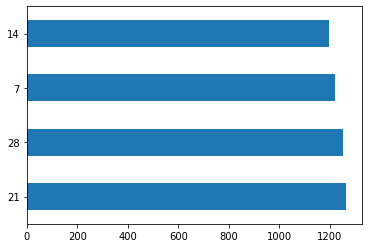

In [30]:
cliente_df['condicao'].value_counts().plot(kind='barh')
display(cliente_df['condicao'].value_counts().sort_index())

condicoes_ok = cliente_df['condicao'].nunique() == tabela_condicoes.nunique()['condicao']
print('Condições estão de acordo?\n' + str(['Sim' if condicoes_ok else 'Não'][0]))
